In [1]:
import numpy as np
import matplotlib.pyplot as plt

%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def erk1(u, tau, M, lambda_):
    for m in range(M):
        u[m + 1] = u[m] + tau * lambda_ * u[m]
    return u

def dirk1(u, tau, M, lambda_):
    for m in range(M):
        u[m + 1] = (1/(1-tau*lambda_))*u[m]
    return u

def cros1(u, tau, M, lambda_):
    ksi = tau*lambda_
    a11 = (1 +1.j)/2
    for m in range(M):
        u[m + 1] = u[m]*(1 - (1 - a11)*ksi)/(1 - a11*ksi)
    return np.real(u)

In [3]:
def modeling(tau, M, lambda_, f, u_0=20):
    u = np.zeros((M + 1, 1))
    u[0,0] = u_0
    u = f(u, tau, M, lambda_)
    return u[:, 0] 

<ipython-input-2-5aefb9d3b06a>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  u[m + 1] = (u[m]*(1 - (1 - a11)*ksi)/(1 - a11*ksi))


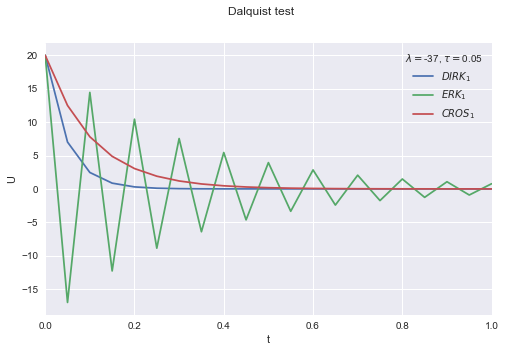

In [4]:
t_0 = 0.; T = 1.

M = 20
tau = (T - t_0) / M 
t = np.linspace(t_0, T, M+1)

lambda_ = -37 # 45 будет разностить, на 40 уходит на консанту

u_dirk1 = modeling(tau, M, lambda_, dirk1)
u_erk1 = modeling(tau, M, lambda_, erk1)
u_cros1 = modeling(tau, M, lambda_, cros1)

plt.figure(figsize=(8, 5))
plt.plot(t, u_dirk1, label='$DIRK_1$')
plt.plot(t, u_erk1, label='$ERK_1$')
plt.plot(t, u_cros1, label='$CROS_1$')


plt.xlabel('t'); plt.ylabel('U')
plt.grid(1)
plt.legend(title=f'$\lambda = ${lambda_:}, $\\tau = ${tau:.2f}')
plt.xlim([t_0, T])
plt.suptitle('Dalquist test')
plt.show()